In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


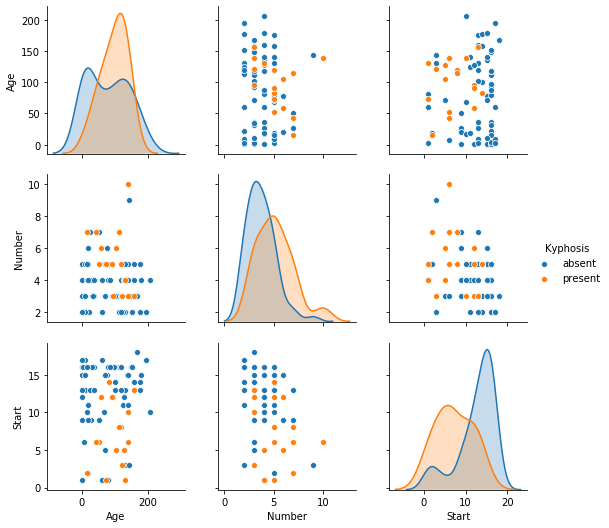

In [8]:
sns.pairplot(df,hue='Kyphosis')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
predictions = dtree.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[18  3]
 [ 2  2]]
              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        21
     present       0.40      0.50      0.44         4

    accuracy                           0.80        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.82      0.80      0.81        25



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(n_estimators=919)

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=919,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rfc_pred = rfc.predict(X_test)

In [77]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[18  3]
 [ 1  3]]
              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25

